In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define the inputs
p = np.array([[1,4], [1,5], [2,4], [2,5], 
              [3,1], [3,2], [4,1], [4,2]])
# define the targets
t = np.array([0, 0, 0, 0, 
              1, 1, 1, 1])

In [3]:
# specify the dimension of each input (number of features in the input data)
R = 2

In [4]:
# specify the number of neurons we need to solve the problem (decision boundaries)
# note: each neuron can create one boundary/separate 2 classes
S = 1

In [5]:
# set the random seed
np.random.seed(0)

# randomly initialize weights (between 0 and 1)
W = np.random.random(size=(S, R))
# randomly initialize bias (between 0 and 1)
b = np.random.random(size=(S, 1))

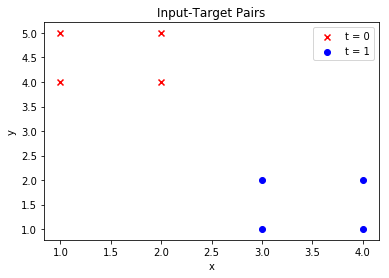

In [6]:
# we can plot the input-target pairs to see if the classes are linearly separable
plt.figure()
plt.scatter(p[:,0][np.where(t == 0)], p[:,1][np.where(t == 0)],
            color='r', marker='x', label='t = 0')
plt.scatter(p[:,0][np.where(t == 1)], p[:,1][np.where(t == 1)],
            color='b', label='t = 1')
plt.title('Input-Target Pairs')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [7]:
# define the hard limit transfer function
def hardlim(n):
    if n >= 0:
        return 1
    else:
        return 0

In [8]:
# more efficient implementation 
def hardlim(n):
    return np.where(n >= 0, 1, 0)

In [9]:
# ensure the transfer function is working properly 
n = np.arange(-3,3)
print('net-input: {}'.format(n))
print('prediction: {}'.format(hardlim(n)))

net-input: [-3 -2 -1  0  1  2]
prediction: [0 0 0 1 1 1]


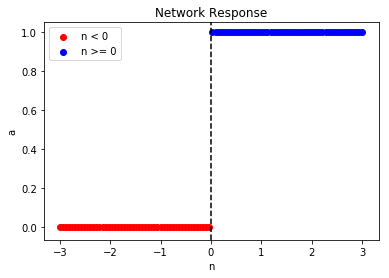

In [10]:
# create dummy data and some predictions
x = np.linspace(start=-3, stop=3, num=100)
n = hardlim(x)

# plot the transfer function
plt.figure()
plt.scatter(x[np.where(n == 0)], n[np.where(n == 0)],
            color='r', marker='o', label='n < 0')
plt.scatter(x[np.where(n == 1)], n[np.where(n == 1)],
            color='b', label='n >= 0')
plt.axvline(x=0, ymin=0, ymax=1, color='k', ls='--')
plt.title('Network Response')
plt.xlabel('n')
plt.ylabel('a')
plt.legend(loc='best')
plt.show()

In [11]:
# initialize a zero vector of errors for each output-target
e = np.zeros(len(t))
# initialize an empty vector to store the error for each training epoch
epoch_e = []
# number of iterations to train for
epochs = 10

In [12]:
# now it's time to train the network!

# for each training epoch
for epoch in range(epochs):
    # for each input 
    for i in range(p.shape[0]):
        # propagate the input forward
        n = np.dot(W, p[i, :]) + b
        a = hardlim(n)
        # --- perceptron learning rule ---
        # calculate the error
        e[i] = t[i] - a
        # update the weights: W_new = W_old + (e * p^T) 
        W = W + e[i] * p[i, :].transpose()
        # update the bias: b_new = b_old + e 
        b = b + e[i]
    # calculate total # of misclassification for the epoch and add to epoch_e
    epoch_e.append(abs(e).sum())

In [13]:
# print out the trained perceptron parameters

print('The parameters of the trained perceptron are: ')
print('-'*50)
print('Weights: [%.2f, %.2f]' % (W[0, 0], W[0, 1]))
print('Bias: %.2f' % b)
W_u = W / np.linalg.norm(W)
print('Normalized Weight Vector: [%.2f, %.2f]' % (W_u[0, 0], W_u[0, 1]))

The parameters of the trained perceptron are: 
--------------------------------------------------
Weights: [2.55, -2.28]
Bias: 0.60
Normalized Weight Vector: [0.74, -0.67]


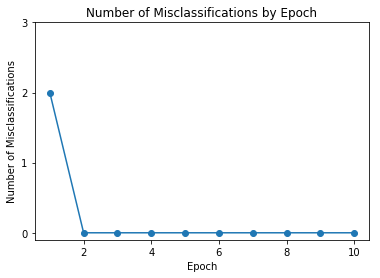

In [14]:
# plot the error of the network as we train it 

plt.figure()
plt.plot(np.arange(1,epochs+1), epoch_e, marker='o')
plt.title('Number of Misclassifications by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.yticks(np.arange(4))
plt.show()

In [115]:
# it says our error is zero, let's check if it really is

print('Error for the trained network:')
print('-'*30)
for i in range(p.shape[0]):
    # propagate input forward
    n = np.dot(W, p[i, :]) + b
    a = hardlim(n)
    # compare the target to the prediction
    e = t[i] - a
    # print the results
    print('[input {}]'.format(i+1))
    print('t: {}, a: {}, e: {}'.format(t[i], int(a), int(e)))

Error for the trained network:
------------------------------
[input 1]
t: 0, a: 0, e: 0
[input 2]
t: 0, a: 0, e: 0
[input 3]
t: 0, a: 0, e: 0
[input 4]
t: 0, a: 0, e: 0
[input 5]
t: 1, a: 1, e: 0
[input 6]
t: 1, a: 1, e: 0
[input 7]
t: 1, a: 1, e: 0
[input 8]
t: 1, a: 1, e: 0


**Recall.** The net-input of the perceptron is denoted as follows: 

$\mathbf{n} = \mathbf{W}\mathbf{p} + \mathbf{b}$

Moreover, we denote the network output, $\mathbf{a}$, as follows: 

$\mathbf{a} = hardlim(\mathbf{n})$

We saw before when we plotted the network response, $\mathbf{a}$, against the net-input of the network, $\mathbf{n}$, that the "switching" from the *negative* class to the *positive* class happens at $\mathbf{n} = 0$. This is exactly the same as our decision threshold or *decision_function* from sklearn. For this reason, we can solve for the equation of the decision boundary by setting $\mathbf{n} = 0$ and solving for $\mathbf{p}$.

In [70]:
# calculate the equation of the line of the decision boundary

x = np.linspace(start=-5, stop=5, num=20)
DB = -W[0, 0] * x / W[0, 1] - b/W[0, 1]

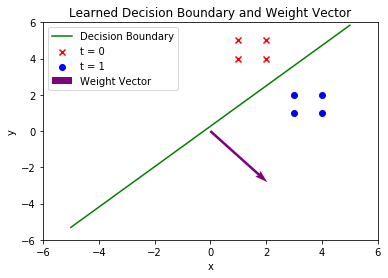

In [92]:
# plot the decision boundary

plt.figure()
# t = 0
plt.scatter(p[:,0][np.where(t == 0)], p[:,1][np.where(t == 0)],
            color='r', marker='x', label='t = 0')
# t = 1
plt.scatter(p[:,0][np.where(t == 1)], p[:,1][np.where(t == 1)],
            color='b', label='t = 1')
# decision boundary
plt.plot(x, DB[0], color='g', label='Decision Boundary')
# weight vector
plt.quiver(W[0, 0], W[0, 1], scale=15,
           color='purple', label='Weight Vector')
plt.ylim(-6, 6)
plt.xlim(-6, 6)
plt.title('Learned Decision Boundary and Weight Vector')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

In [21]:
# create a function to predict new (unseen) toys
def predict(p):
    n = np.dot(W, p) + b
    return hardlim(n)

# create a function to evaluate prediction
def score(a, t):
    if t - a == 0: 
        print("Correct!")
    else: 
        print("Incorrect :(")

In [22]:
a = predict([4, 1])
score(a, 1)

Correct!


## Why don't we just write our own perceptron like sklearn?

In [121]:
class Perceptron(object):
    """
    Perceptron classifier.
    
    Parameters
    ------------
    n_iter : int
      Passes over the training dataset (epochs.
    random_state : int
      Random number generator seed for random weight
      initialization.
    
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    
    def __init__(self, n_iter=50, random_state=0):
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        
        """
        Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        
        Returns
        -------
        self : object
        """
        
        # create a random state
        rgen = np.random.RandomState(self.random_state)
        # randomly initialize weights and bias from normal distribution
        # with 0 mean and 0.01 std and use the random state
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # initialize an empy vector for epoch error
        self.errors_ = []

        # for each epoch 
        for _ in range(self.n_iter):
            # zero out the error
            errors = 0
            # for each input-target pair
            for xi, target in zip(X, y):
                # calculate the update (error)
                update = target - self.predict(xi)
                
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        # n = wp + b
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Pass the net input to the hard limit transfer function"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [126]:
# instantiate our perceptron
ppn = Perceptron(n_iter=10)
# fit ("train") the perceptron
ppn.fit(X=p, y=t)
# make predictions after training
y_pred = ppn.predict(X=p)

In [152]:
bias = ppn.w_[0]
weights = ppn.w_[1:]

In [154]:
# print out the trained perceptron parameters

print('The parameters of the trained perceptron are: ')
print('-'*50)
print('Weights: {}'.format(weights))
print('Bias: {}'.format(b))
norm_weights =  weights / np.linalg.norm(weights)
print('Normalized Weight Vector: {}'.format(norm_weights))

The parameters of the trained perceptron are: 
--------------------------------------------------
Weights: [ 2.00400157 -2.99021262]
Bias: [[ 0.60276338]]
Normalized Weight Vector: [ 0.55672308 -0.83069815]


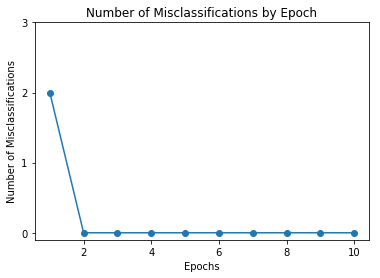

In [156]:
# plot the error of the network as we train it 

plt.figure()
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.yticks(np.arange(4))
plt.title('Number of Misclassifications by Epoch')
plt.show()

In [159]:
# function to plot the decision regions

# from: Python Machine Learning 2nd Edition* by [Sebastian Raschka]

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

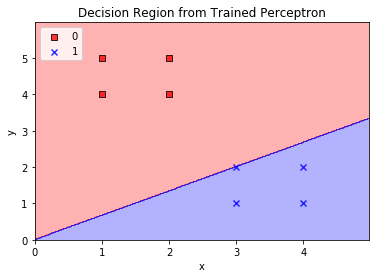

In [165]:
plot_decision_regions(X=p, y=t, classifier=ppn)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Region from Trained Perceptron')
plt.legend(loc='upper left')
plt.show()